获取前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [17]:
def demean(X):
    return X - np.mean(X, axis=0)
X = demean(X)

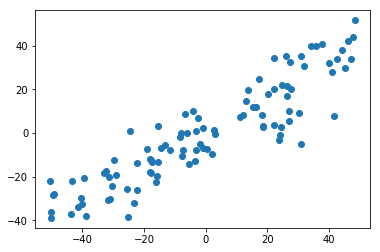

In [18]:
plt.scatter(X[:, 0], X[:, 1])

In [29]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [30]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.78562734, 0.61869999])

求第二主成分

In [31]:
#X2 = np.empty(X.shape)
#for i in range(len(X)):
#    X2[i] = X[i] - X[i].dot(w)*w # 减去第一主成分上的分量
    
X2 = X - X.dot(w).reshape(-1,1)*w

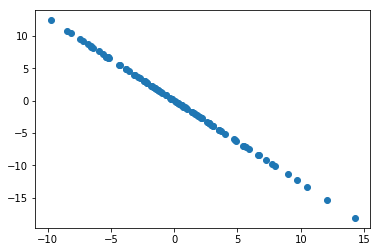

In [32]:
plt.scatter(X2[:, 0], X2[:, 1])

In [33]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.61870528, -0.78562318])

In [34]:
w.dot(w2)

6.736549310659701e-06

In [35]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1)*w
        
    return res


In [36]:
w_n = first_n_components(2, X)

In [37]:
w_n

[array([0.78562718, 0.61870019]), array([-0.61869528,  0.78563105])]

In [38]:
w_n[0].dot(w_n[1])

6.2542487123118384e-06